In [14]:
#importing required libraries :
import pymongo
import json
import pprint

#connecting mongo client:
client = pymongo.MongoClient('mongodb://localhost:27017')

print(client.list_database_names()) #showing all database list of system:

#selecting database:
db = client['store_data']

['admin', 'config', 'local', 'store_data', 'test']


In [18]:
#creating collection import:
db.create_collection("import_data")

#creating collection export:
db.create_collection("export_data")

In [17]:
# db.get_collection("import_data").delete_many({})
# db.get_collection("export_data").delete_many({})

#for deleting all records from collections

In [19]:
#inserting export data into the collection export_data :

file=open("2018-2010_export.json")
file_export_data = json.load(file)

export_data = db.get_collection("export_data")
export_data.insert_many(file_export_data)

In [20]:
#inserting import data into the collection import_data :

file=open("2018-2010_import.json")
file_import_data = json.load(file)

import_data = db.get_collection("import_data")
import_data.insert_many(file_import_data)

In [21]:
#total no. of records in both collections :

print("import_data_records : ",import_data.count_documents({}))
print("export_data_records : ",export_data.count_documents({}))

import_data_records :  93095
export_data_records :  137023


# Analysis on imports of India from 2010 to 2018


In [111]:
#sample record
pprint.pprint(import_data.find_one())
total_cost=import_data.aggregate([ { 
    "$group": { 
        "_id": 'null', 
        "total": { 
            "$sum": "$value_million_dollar" 
        } 
    } 
} ] )
print()
for i in total_cost:
    print("Total import cost : ",i['total']," m$")
print("average cost per commodity : ",i['total']/import_data.count_documents({})," m$")

{'Commodity': 'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
 'HSCode': 5,
 '_id': ObjectId('614c154c302e11e0a371944b'),
 'country': 'AFGHANISTAN TIS',
 'value_million_dollar': 0,
 'year': 2018}

Total import cost :  5004202.27  m$
average cost per commodity :  53.753716848380684  m$


# counting total no.of unique commodities,counties and its list 

In [92]:
print("Total unique commodities : ",len(import_data.distinct("Commodity")))
print("Total countries participated : ",len(import_data.distinct("country")))
# for i in import_data.distinct("Commodity"):
#     print(i)
# for i in import_data.distinct("country"):
#     print(i)

Total unique commodities :  98
Total countries participated :  242



# counting total no. of each commodities :

 Top-5 most imported commodity :
{'_id': 'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.', 'Total': 2174}
{'_id': 'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.', 'Total': 2090}
{'_id': 'PLASTIC AND ARTICLES THEREOF.', 'Total': 1866}
{'_id': 'MISCELLANEOUS GOODS.', 'Total': 1836}
{'_id': 'IRON AND STEEL', 'Total': 1826}


<BarContainer object of 5 artists>

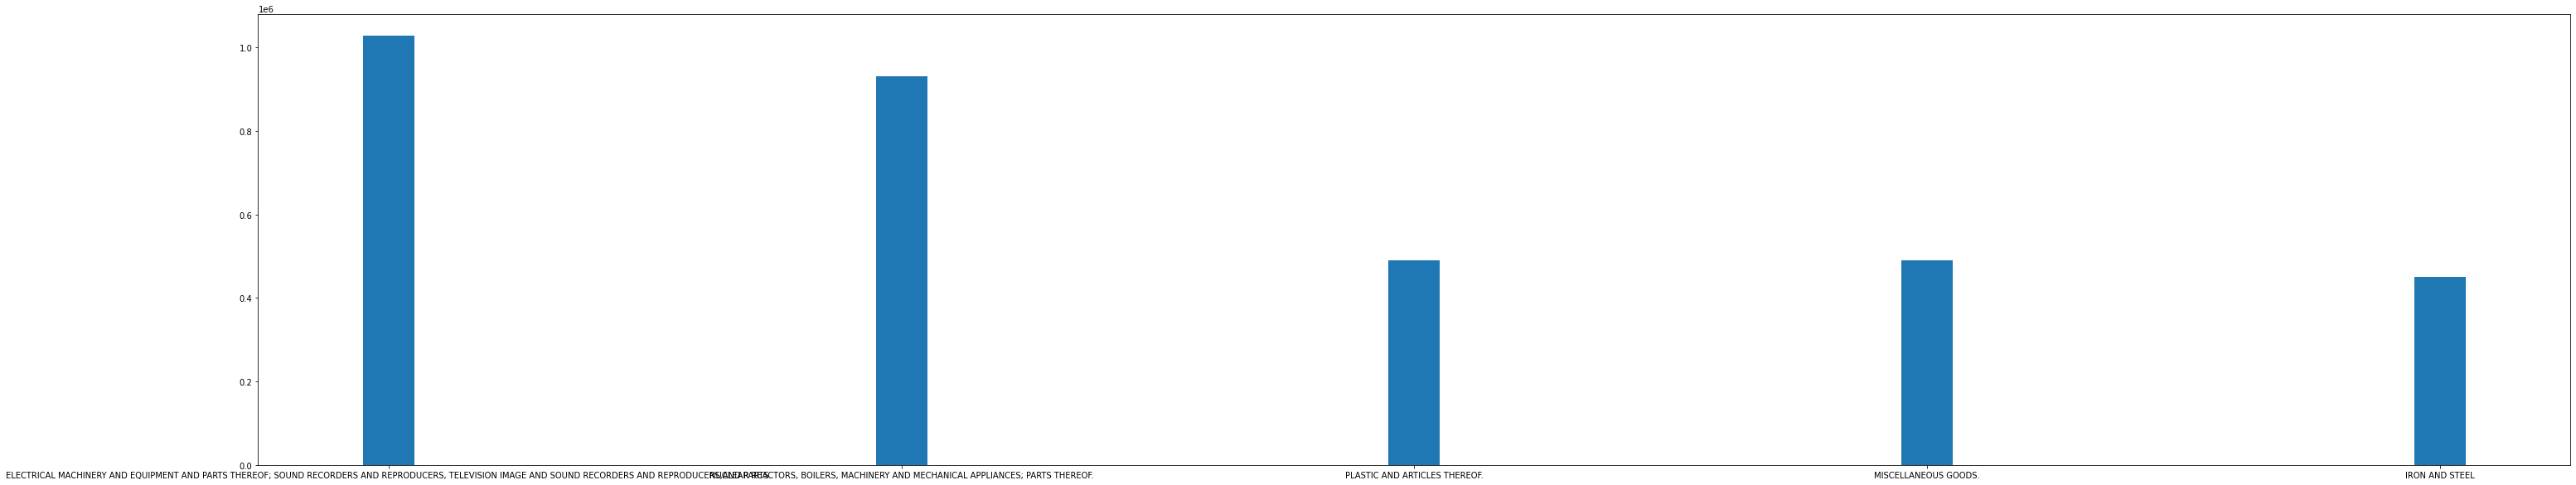

In [112]:
total_each_commodity = import_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "Total":{"$sum":1}
      }},{ "$sort" : { "Total" : -1 } }
    ])
commodity=[]
total=[]
print(" Top-5 most imported commodity :")
for i in total_each_commodity:
    commodity.append(i['_id'])
    total.append(i['Total'])
    if len(total)<=5:
        print(i)
    
    
plt.figure(figsize=(50, 10)) 

#Top-5 most imported commodity 
plt.bar(commodity[0:5], cost[0:5],width=0.1)

# count year-wise import_cost  


{'_id': 2018, 'value': 1028142.66}
{'_id': 2017, 'value': 931148.04}
{'_id': 2012, 'value': 490730.07}
{'_id': 2011, 'value': 489311.81}
{'_id': 2013, 'value': 450192.99}
{'_id': 2014, 'value': 448026.63}
{'_id': 2015, 'value': 412537.53}
{'_id': 2016, 'value': 384350.29}
{'_id': 2010, 'value': 369762.25}


<BarContainer object of 9 artists>

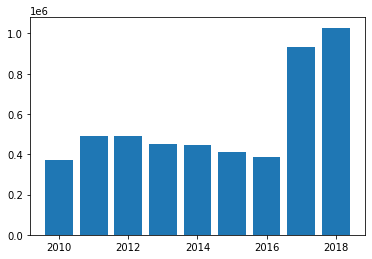

In [94]:
import matplotlib.pyplot as plt
yearwise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$year",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
years=[]
cost=[]
for i in yearwise_cost:
    years.append(i['_id'])
    cost.append(i['value'])
    print(i)
    

plt.bar(years, cost)

# count country-wise import_cost  

top-5 countries from where we Import : 
Country :  CHINA P RP , value :  678877.15
Country :  U ARAB EMTS , value :  307810.15
Country :  SAUDI ARAB , value :  292104.09
Country :  U S A , value :  281436.58
Country :  SWITZERLAND , value :  243739.33000000002


<BarContainer object of 5 artists>

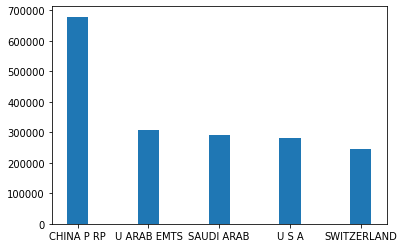

In [113]:
import matplotlib.pyplot as plt
countrywise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$country",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
countries=[]
cost2=[]
print("top-5 countries from where we Import : ")
for i in countrywise_cost:
    countries.append(i['_id'])
    cost2.append(i['value'])
    if len(cost2)<=5:
        print("Country : ",i['_id'],", value : ",i['value'])
    
   
plt.bar(countries[0:5], cost2[0:5], width=0.3)

# counting top-5 most expansive imports

Commodity :  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES. , value :  1618556.68
Commodity :  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN. , value :  770826.15
Commodity :  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS. , value :  427570.66
Commodity :  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF. , value :  393021.9
Commodity :  ORGANIC CHEMICALS , value :  192168.0


<BarContainer object of 5 artists>

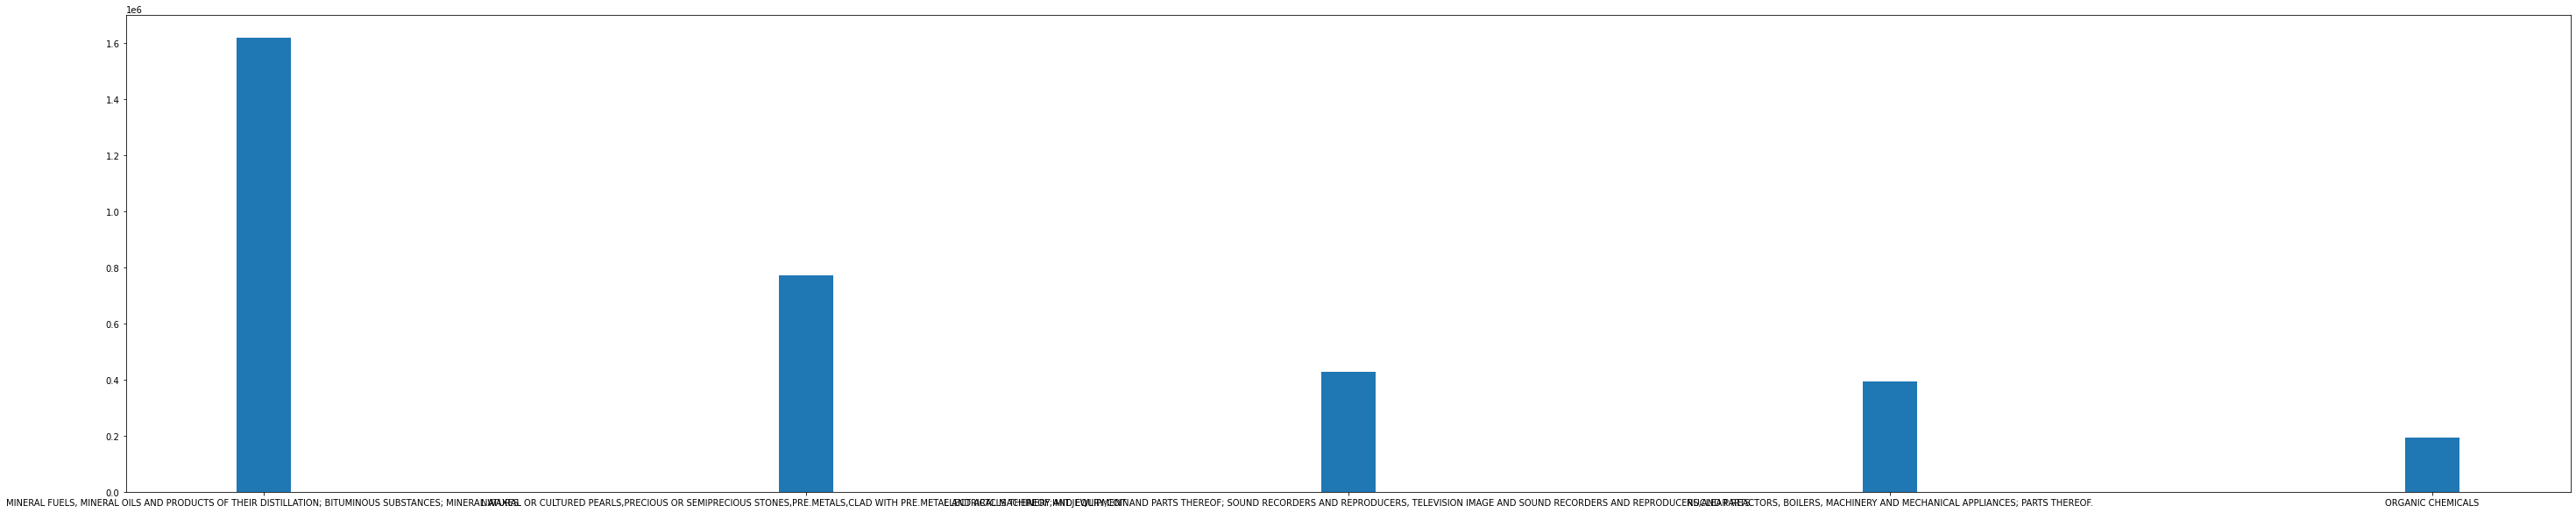

In [101]:
commoditywise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
commodities=[]
cost3=[]
for i in commoditywise_cost:
    commodities.append(i['_id'])
    cost3.append(i['value'])
    if len(cost3)<=5:
        print("Commodity : ",i['_id'],", value : ",i['value'])
    
plt.figure(figsize=(50, 10))    
plt.bar(commodities[0:5], cost3[0:5], width=0.1)